### EE 421/521 Image Processing - Spring 2019-20

## Project 2 - Image Enhancement

#### Submission deadline: 8 March 2021

In this project, you will implement the following:

1. Histogram calculation
2. Histrogram equalization for image enhancement
3. Histogram matching

**This project will be graded for both EE 421 (HW1) and EE 521 (HW1) students.**

*Copyright (c) 2021 by Arif Tanju Erdem*
##### Neva Yaren Bulut

In [9]:
# STEP 0 Import the necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# histogram calculation
from skimage import exposure

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

In [10]:
# my function to round image data to nearest integer, then
# truncate to range [0, 255], and then set data type to uint8

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    assert imgRGB.shape[2] == 3
    
    # get the luminance data
    imgLum = color.rgb2gray(imgRGB)

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

In [11]:
# my function to convert float image data from range [0, 1] to range [0, 255], 
# and then set data type to uint8

def my_float2int(img):
    
    img = np.round(img * 255, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

# end of function

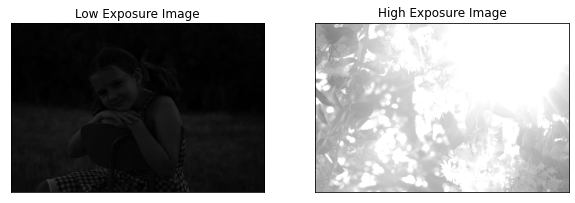

In [12]:
# STEP 1 Pick two different images, one with low exposure (i.e., a dark image) 
# and one with high exposure (i.e., a bright image). Find and display their luminance.

# set YOUR image folder
image_folder = r'D:\yeni\Dersler\EE421-imageprocessing\images'

# read YOUR under exposed image 
image_file = r'/under_img.jpg'
image_path = image_folder + image_file
imgRGB_low = io.imread(image_path)

# read YOUR over exposed image 
image_file = r'/over_img.jpg'
image_path = image_folder + image_file
imgRGB_high = io.imread(image_path)

# calculate the luminance image
img_low = my_imgLuminance(imgRGB_low)
img_high = my_imgLuminance(imgRGB_high)

# display both images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

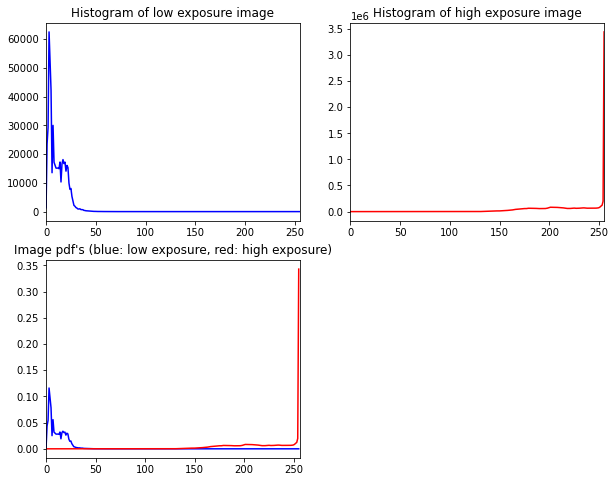

In [13]:
# ==================================
# (1) Histogram calculation
# ==================================

# ADD YOUR CODE HERE

# 1.1 write a function to calculate the histogram of an image
def calcHistogram( img):
    
    if len(img.shape)==3:#if image colorful we need to covert to grayscale.
        gr_img=my_imgLuminance(img)#in order to convert grayscale, I called my_imgLuminance function.
    else:
        gr_img=img
    # calculate histogram here    
    histogram = np.zeros([256])

    for x in range(gr_img.shape[0]):#first we look width of the picture
        for y in range(gr_img.shape[1]):#then hight
            pixel= int(gr_img[x, y])
            histogram[pixel] += 1 #increasing same pixel values number
         
    return histogram

# end of function

# 1.2 calculate the histograms using the above function
hist_low=calcHistogram(img_low)
hist_high= calcHistogram(img_high)
# 1.3 calculate the pdf's
pdf_low = hist_low / hist_low.sum()
pdf_high = hist_high / hist_high.sum()

# 1.4 display the histograms and pdf's
plt.figure(figsize=(10,8))
plt.subplot(221), plt.plot(hist_low, 'b')
plt.xlim(0, 255)
plt.title('Histogram of low exposure image')
plt.subplot(222), plt.plot(hist_high, 'r')
plt.xlim(0, 255)
plt.title('Histogram of high exposure image')
plt.subplot(223)
plt.plot(pdf_low, 'b')
plt.xlim([0,256])
plt.plot(pdf_high, 'r')
plt.xlim([0,256])
plt.title("Image pdf's (blue: low exposure, red: high exposure)")
plt.show()
plt.close()

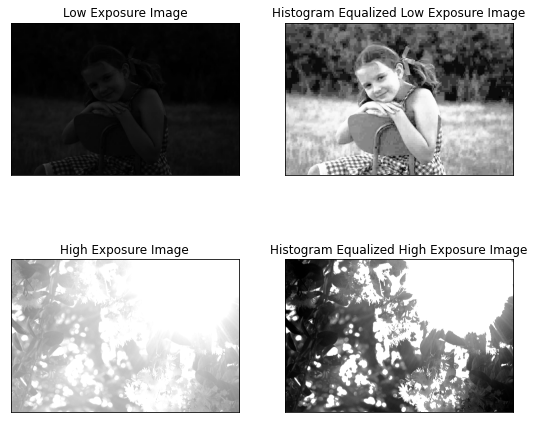

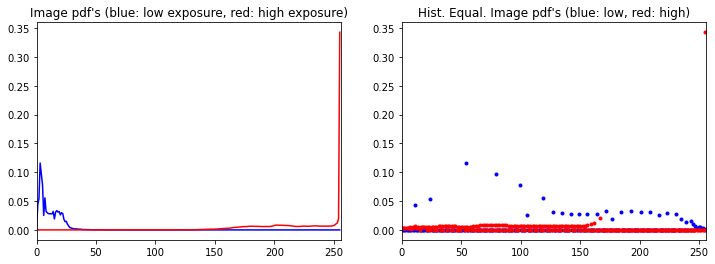

In [14]:
# ===============================
# (2) Histrogram equalization
# ===============================

# ADD YOUR CODE HERE

# 2.1 write a function to equalize the histogram of an image
def equalizeHistogram(img):
    H,W=img.shape # M and N according to formula
    imgEqualized=img.copy()
    
    # calculate histogram equalized image here
    S=H*W#total number of pixels
    sum_h=0
    z_max=255 #max value of pixels for 8 bit grayscale image
    for i in range(1, 255):
        ind = np.where(img == i)
        sum_h += len(img[ind])
        z_prime = z_max / S * sum_h
        imgEqualized[ind] = z_prime
 
    return imgEqualized

# end of function

# 2.2 obtain the histogram equalized images using the above function
img_low_eq=equalizeHistogram(img_low)
img_high_eq=equalizeHistogram(img_high)

# 2.3 calculate the pdf's of the histogram equalized images
hist_low_eq= calcHistogram(img_low_eq)
hist_high_eq= calcHistogram(img_high_eq)
pdf_low_eq = hist_low_eq / hist_low_eq.sum()
pdf_high_eq = hist_high_eq / hist_high_eq.sum()

# 2.4 display the histogram equalized images and their pdf's
plt.figure(figsize=(9,8))
plt.subplot(221), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_low_eq, cmap = 'gray', vmin=0, vmax=255)
plt.title('Histogram Equalized Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_high_eq, cmap = 'gray', vmin=0, vmax=255)
plt.title('Histogram Equalized High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(pdf_low, 'b'),plt.xlim([0,256])
plt.plot(pdf_high, 'r'),plt.xlim([0,256])
plt.title("Image pdf's (blue: low exposure, red: high exposure)")
plt.subplot(122), plt.plot(pdf_low_eq, '.b'), plt.xlim([0,256])
plt.plot(pdf_high_eq, '.r'), plt.xlim([0,256])
plt.title("Hist. Equal. Image pdf's (blue: low, red: high)")
plt.show()
plt.close()

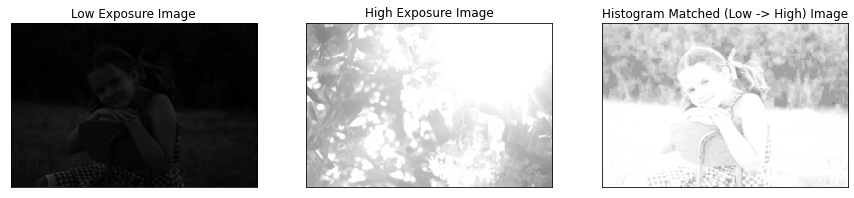

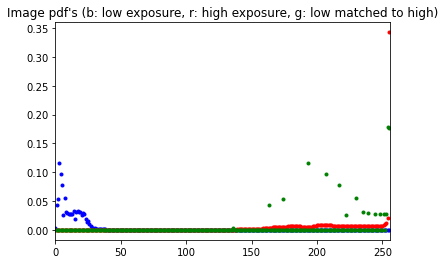

In [15]:
# ===============================
# (3) Histogram matching
# ===============================

# ADD YOUR CODE HERE

# 3.1 write a function to match the histogram of one image to that of another image
def matchHistogram( imgSource, imgTarget):
    oldshape = imgSource.shape
    imgSource = imgSource.ravel()
    imgTarget = imgTarget.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin, s_counts = np.unique(imgSource, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(imgTarget, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_q = np.cumsum(s_counts).astype(np.float64)
    s_q /= s_q[-1]
    t_q = np.cumsum(t_counts).astype(np.float64)
    t_q /= t_q[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    imgMatched = np.interp(s_q, t_q, t_values)

    return imgMatched[bin].reshape(oldshape)

# end of function

# 3.2 obtain the histogram matched image using the above function
my_img_matched = matchHistogram(img_low, img_high)
np.round(my_img_matched, 0, my_img_matched)
# set data type to integer
img_matched = my_img_matched.astype(np.uint8)

# 3.3 calculate the pdf of the histogram matched image
hist_matched, bins = exposure.histogram(img_matched, source_range='dtype')
pdf_matched = hist_matched / hist_matched.sum()

# 3.4 display the histogram matched image and its pdf
plt.figure(figsize=(15,4))
plt.subplot(131), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_matched, cmap = 'gray', vmin=0, vmax=255)
plt.title('Histogram Matched (Low -> High) Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(6,4))
plt.plot(pdf_low, '.b')
plt.xlim(0, 256)
plt.plot(pdf_high, '.r')
plt.xlim(0, 256)
plt.plot(pdf_matched, '.g')
plt.xlim(0, 256)
plt.title("Image pdf's (b: low exposure, r: high exposure, g: low matched to high)")
plt.show()
plt.show()
plt.close()


*STEP 4 Comments on the results*

*ADD YOUR COMMENTS HERE*

(a) Compare the histogram equalized images obtained in Step 2 with the original images in Step 1. Comment on any improvements in the visual quality.

Low exposed image was darker before. Low exposed image becomed more brighter. High exposed image ws more bright before. now,it is less bright. Their histogram more flatter.

(b) Comment on the appearance of the histogram matched image obtained in Step 3. Why would one  use histogram matching?

iF we match low exposed image with an high exposed image, we can get more bright version of low exposed image. We do not aim to make histogram flat as we did on equalization.
